In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from Algorithm import ExpRegression

In [2]:
data_df = pd.read_csv('HousePrice.csv')

data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data_df['date'] = data_df['date'].str.replace('T000000','')
data_df=data_df.drop(columns=['id'],axis=1)
data_array = data_df.values.astype(float)
data_df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
mean = np.mean(data_array,axis=0)
sd = np.std(data_array,axis=0)

data_array_norm = (data_array - mean)/sd

data_array_norm

array([[-0.65134259, -0.86671733, -0.39873715, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.60716342, -0.00568792, -0.39873715, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [ 1.42507844, -0.98084935, -1.47395936, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-0.73925012, -0.37586519, -1.47395936, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [ 1.40050941, -0.38158814, -0.39873715, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-0.65089178, -0.58588173, -1.47395936, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [5]:
labels = data_array_norm[:,1]
x_array_norm = np.delete(data_array_norm,1,axis=1)
x_train, x_test, y_train, y_test = train_test_split(data_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 20) (3242, 20) (18371,) (3242,)


In [6]:
model=ExpRegression(10000,0.01)
model.fit(x_train,y_train)

Final Loss: 0.13186245622504544


In [7]:
model.evaluate(x_test,y_test)

0.11642187313950181

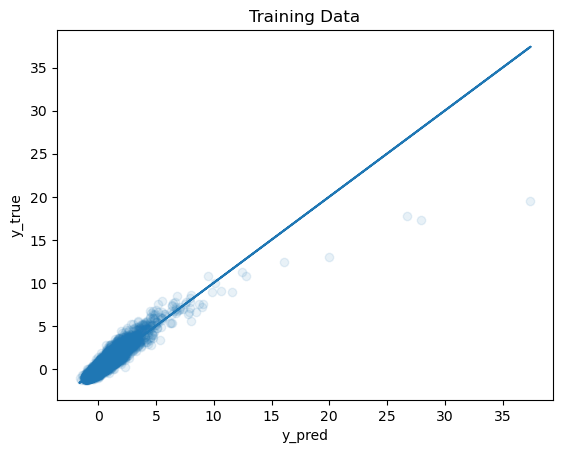

In [8]:
y_pred_train = model.predict(x_train)

plt.scatter(y_pred_train,y_train,alpha=0.1)
plt.plot(y_pred_train,y_pred_train)
plt.title("Training Data")
plt.ylabel('y_true')
plt.xlabel('y_pred')
plt.savefig('Exponential-Regression-Plot.png')
plt.show()